# Installation

https://orinanobworld.blogspot.com/2011/07/perils-of-big-m.html

https://or.stackexchange.com/questions/236/why-is-it-important-to-choose-big-m-carefully-and-what-are-the-consequences-of-d/237?newreg=00c083ee76a2471ca1964993f30d078a

https://algorithms.tutorialhorizon.com/valid-pickup-and-delivery-options/

The aim of the hierarchical multi-objective function (1) is first to determine the minimum fleet size and vehicle mix that satisfies the demand and then to improve class service levels.
Constraints (-) and  (-) ensure that all users are serviced exactly once and that the same vehicle visits their origin and destination nodes.
Constraints (-) and (-) guarantee that every scheduled vehicle $k$ departs from its origin $o^k$ and stops at the delivery node of its last request.
Constraints (-) impose that vehicles can only pick up and deliver users within their working time window.
The consistency of arrival and ride times is ensured by constraints (-) and (-), whereas the consistency of load variables is ensured by inequalities (-) and (-).
Constraints (-)-(-) implement the user \tagsqa{}s.
First, constraints (-) enforce that the service-level expectations of a minimum share of users from each class are met.
Next, Constraints (-), (-), and (-) ensure that service levels are consistent with maximum pickup and in-vehicle delays.
Then, equalities (-) and (-) ensure that users whose class entails a private ride are picked up by empty vehicles and travel directly to their destination.
Finally, constraints (-)-(-) declare the variables.

# Formulation


|       Sets       | Description                                                     |
|:----------------:|-----------------------------------------------------------------|
|        $K$       | Vehicles                                                        |
|        $P$       | Pickup nodes and request indices                                |
|        $D$       | Delivery nodes                                                  |
|        $O$       | Origin nodes $o^k$ of vehicles $k \in K$                        |
|        $N$       | $= P \cup D \cup O$                                             |
                                        
The parameter data are the following:                                                
                                        
|    Parameters    | Description                                                     |
|:----------------:|-----------------------------------------------------------------|
|       $Q^k$      | Capacity of vehicle $k \in K$                                   |
|     $t_{i,j}$    | Travel time from node $i$ to node $j$                           |
|       $d_i$      | Service duration at node $i \in N$                              |
|      $q_i$       | Number of passengers of request $i$                             |
|      $e_i$       | Earliest pickup time of request $i$                             |
|      $l_i$       | Latest pickup time of request $i$                               |
                                        
And variables:                                                                       
                                        
|     Variables    | Description                                                     |
|:----------------:|-----------------------------------------------------------------|
|  $x_{i,j}^k$     | (Binary) 1 if vehicle $k$ travels from $i$ to $j$, 0 otherwise  |
|     $L_i^k$      | In-vehicle delay of user $i$ in vehicle $k$                     |
|     $B_i^k$      | Arrival time of vehicle $k$ at node $i$                         |
|     $Q_i^k$      | Load of vehicle $k$ after visiting node $i$                     |

$$
\begin{align*}
	& \text{Minimize:}                                                         &   &                                     &       \\
	& \sum_{k \in K}{\sum_{i \in N}{\sum_{j \in N}{c_{i,j}^k x_{i,j}^k}}}      &   &                                     & (1)   \\\\
	& \text{Subject to:}                                                       &   &                                     &       \\
	%--------- Requests                                                        
	& \sum_{k \in K}{\sum_{j \in N}{x_{i,j}^k}}  = 1                           &   & \forall i \in P,                    & (2)   \\
	& \sum_{j \in N}{x_{ij}^k} - \sum_{i \in N}{x_{n+i,j}^k}= 0                &   & \forall i \in P,\;  k \in K,        & (3)   \\
	& \sum_{i \in P}{x_{0j}^k} \leq 1                                          &   & \forall k \in K,                    & (4)   \\
	& \sum_{j \in N}{x_{ji}^k} - \sum_{j \in N}{x_{ij}^k} = 0                  &   & \forall i \in P \cup D, \;k \in K,  & (5)   \\
	& \sum_{i \in N}{x_{i,2n+1}^k}  = 1                                        &   & \forall k \in K,                    & (6)   \\
	%--------- Consistency of time and load                                    
	& B_j^k   \geq (t_{i,j} + d_i + B_i^k)x_{i,j}^k                            &   & \forall i,j \in N,\; k \in K,       & (7)   \\
	& Q_j^k   \geq (Q_i^k + q_j)x_{i,j}^k                                      &   & \forall i,j \in N,\; k \in K,       & (8)   \\
	& L_i^k   = B_{n+i}^k - (B_i^k + d_i)                                      &   & \forall i \in P,\; k \in K,         & (9)   \\
	& B_{2n+1}^k - B_0^k   \leq T_k                                            &   & \forall k \in K,                    & (10)  \\
	%--------- Vehicles                                                        
	& e_i       \leq B_i^k  \leq l_ i                                          &   & \forall i \in N, \; k \in K,        & (11)  \\
	& t_{i,n+1} \leq L_i^k  \leq L                                             &   & \forall i \in P, \; k \in K,        & (12)  \\
	& \max\{0, q_i\} \leq Q_i^k  \leq      \min\{Q^k, Q^k + q_i\}              &   & \forall i \in N, \; k \in K,        & (13)  \\
	& x_{ij}^k  \in \{0,1\}                                                    &   & \forall i,j \in N, \; k \in K,      & (14)  \\
	& B_i^k, \;Q_i^k, \;L_i^k  \in  \mathbb{N}                                 &   & \forall i \in N, \; k \in K.        & (15)
\end{align*}
$$

The quadratic constraints (7) and (8) are linearized using the Big-M method by introducing constants $M$ and $W$:

$$
\begin{align*}
    & B_j^k -B_i^k \geq t_{i,j} + d_i  - M_{i,j}^k (1 - x_{i,j}^k) &   & \forall i,j \in N,\; k \in K & (16)    \\
    & Q_j^k - Q_i^k  \geq q_j - W_{i,j}^k (1 - x_{i,j}^k)            &   & \forall i,j \in N,\; k \in K & (17)
\end{align*}
$$

The validity of the Big-M constants $M$ and $W$ in (16) and (17) is ensured by setting $M_{i,j}^k \geq \max\{0, l_i +t_{i,j} + d_i - e_j\}$ and $W_{i,j}^k \geq \min\{2Q^k, 2Q^k + q_i\}$ $\forall i,j \in N, k \in K$.

In [1]:
# !sudo apt install jupyter-core
!python -m pip install --upgrade --user ortools

Requirement already up-to-date: ortools in /home/bbeirigo/.local/lib/python3.8/site-packages (9.1.9490)


In [2]:
# %%
from ortools.linear_solver import pywraplp
import math
import matplotlib.pyplot as plt
# from pyomo.environ import ConcreteModel, Var, PositiveReals, Objective, Constraint, maximize, SolverFactory

BIGM = 1000
BIGMQ = 5
BIG = 5000
TOTAL_HORIZON=10000
TOTAL_DISTANCE_TRAVELED = "total_dist"
TOTAL_WAITING = "total_waiting"
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["constraint_coeffs"] = [
        [5, 7, 9, 2, 1],
        [18, 4, -9, 10, 12],
        [4, 7, 3, 8, 5],
        [5, 13, 16, 3, -7],
    ]
    data["bounds"] = [250, 285, 211, 315]
    data["obj_coeffs"] = [7, 8, 2, 9, 6]
    data["num_vars"] = 5
    data["num_constraints"] = 4
    return data


class Darp:
    def __init__(self, N, P, D, K, Q, L, el, d, q, dist_matrix):
        # data = create_data_model()
        self.N = N # Set of all nodes in graph
        self.P = P # Pickup locations
        self.n = len(P) # Number of requests
        self.D = D # Delivery locations
        self.K = K # Set of vehicles
        self.Q = Q # Capacity of a vehicle
        self.L = L # Max. ride time of a request
        self.el = el # node i time window (earliest, latest)
        self.d = d # service duration at node i
        self.q = q # amount loaded onto vehicle at node i (q_i = q_{n+i})
        self.dist_matrix = dist_matrix
        
        self.ods = [
            (origin, destination)
            for origin in dist_matrix
            for destination in dist_matrix[origin]
            if dist_matrix[origin][destination] != BIG
        ]

        print(self.ods)
        # Variables
        
        # 1 if the kth vehicles goes straight from node i to node j
        self.var_x = {}
        
        # When vehicle k starts visiting node i
        self.var_B = {}
        
        # The load of vehicle k after visiting node i
        self.var_Q = {}
        
        # The ride time of request i on vehicle k
        self.var_L = {}

        # Create the mip solver with the SCIP backend.
        self.solver = pywraplp.Solver.CreateSolver("SCIP")
        infinity = self.solver.infinity()
        print("inf:", infinity)
        self.var_x = {}

        for k in self.K:
            self.var_x[k] = {}
            for i in self.N:
                self.var_x[k][i] = {}
                for j in self.N:
                    self.var_x[k][i][j] = self.solver.IntVar(
                        0, 1, f"x[{k},{i},{j}]"
                    )

        for k in self.K:
            self.var_B[k] = {}
            for i in self.N:
                print( f"B[{k},{i}]")
                self.var_B[k][i] = self.solver.NumVar(
                    0, infinity, f"B[{k},{i}]"
                )

        for k in self.K:
            self.var_Q[k] = {}
            for i in self.N:
                self.var_Q[k][i] = self.solver.IntVar(
                    0, self.Q[k], f"Q[{k},{i}]"
                )

        for k in self.K:
            self.var_L[k] = {}
            for i in self.P:
                self.var_L[k][i] = self.solver.NumVar(
                    0, self.L[i], f"L[{k},{i}]"
                )

        # Routing
        self.constr_every_request_is_served_exactly_once()
        self.constr_same_vehicle_services_pickup_and_delivery()
        self.constr_every_vehicle_leaves_the_start_terminal()
        self.constr_the_same_vehicle_that_enters_a_node_leaves_the_node()
        self.constr_every_vehicle_enters_the_end_terminal()
        
        # Time
        self.constr_ensure_feasible_visit_times()
        self.constr_visit_times_within_requests_tw()
        self.constr_ride_times_are_lower_than_request_thresholds()
        self.constr_ensure_feasible_ride_times()
        
        # Load
        # self.constr_ensure_feasible_vehicle_loads()
        # self.constr_vehicle_loads_are_lower_than_vehicles_max_capacities()
        self.set_objective_function()
        self.solve()

    def plot(self):
        pass

    def stats(self):
        print("Number of variables =", self.solver.NumVariables())
        print("Variables = ", self.solver.variables())
        print("Number of constraints = ", self.solver.NumConstraints())
        # print("Constraints = ", list(map(str, self.solver.constraints())))

    def solve(self):
        status = self.solver.Solve()

        if status == pywraplp.Solver.OPTIMAL:
            print("Objective value =", round(self.solver.Objective().Value()))

            for k in self.K:
                for i in self.N:
                    if i in self.P:
                        print("# ORIGIN")
                        print(
                                self.var_L[k][i].name(),
                                " = ",
                                self.var_L[k][i].solution_value(),
                            )
                        
                    for j in self.N:
                        if self.var_x[k][i][j].solution_value() > 0:
                            print(
                                self.var_x[k][i][j].name(),
                                " = ",
                                self.var_x[k][i][j].solution_value(),
                            )

                            print(
                                self.var_B[k][i].name(),
                                " = ",
                                self.var_B[k][i].solution_value(),
                            )
                            
                            print(
                                self.var_Q[k][i].name(),
                                " = ",
                                self.var_Q[k][i].solution_value(),
                            )
                            print()
            print(
                "Problem solved in %f milliseconds" % self.solver.wall_time()
            )
            print("Problem solved in %d iterations" % self.solver.iterations())
            print(
                "Problem solved in %d branch-and-bound nodes"
                % self.solver.nodes()
            )
        else:
            print("The problem does not have an optimal solution.")

    def set_objective_function(self, obj=TOTAL_DISTANCE_TRAVELED):
        
        if obj == TOTAL_DISTANCE_TRAVELED:
            
            obj_expr = [
                self.dist_matrix[i][j] * self.var_x[k][i][j]
                for k in self.K
                for i in self.N
                for j in self.N
            ]
        
        else:
            obj_expr = [
                self.var_L[k][i] + (self.var_B[k][i] - self.el[i][0])
                for k in self.K
                for i in self.P
            ]

        self.solver.Minimize(self.solver.Sum(obj_expr))

    def constr_every_request_is_served_exactly_once(self):
        for i in self.P:
            constr_label = f"request_{i}_is_served_exactly_once"
            print(constr_label)
            self.solver.Add(
                sum(self.var_x[k][i][j] for k in self.K for j in self.N) == 1,
                constr_label,
            )

    def constr_same_vehicle_services_pickup_and_delivery(self):
        for k in self.K:
            for idx_i, i in enumerate(self.P):
                dest_i = self.N[self.n + idx_i + 1]
                constr_label = f"vehicle_{k}_services_pickup={i}_and_delivery={dest_i}"
                print(constr_label)
                self.solver.Add(
                    sum(self.var_x[k][i][j] for j in self.N)
                    - sum(self.var_x[k][dest_i][j] for j in self.N)
                    == 0,
                    constr_label,
                )

    def constr_every_vehicle_leaves_the_start_terminal(self):
        start_terminal = self.N[0]
        for k in self.K:
            constr_label = f"vehicle_{k}_leaves_start_terminal_{start_terminal}"
            self.solver.Add(
                sum(self.var_x[k][start_terminal][j] for j in self.N) == 1,
                constr_label,
            )

    def constr_the_same_vehicle_that_enters_a_node_leaves_the_node(self):
        for k in self.K:
            for i in self.P + self.D:
                constr_label = f"vehicle_{k}_enters_and_leaves_{i}"
                print(constr_label)
                
                self.solver.Add(
                    sum(self.var_x[k][j][i] for j in self.N)
                    - sum(self.var_x[k][i][j] for j in self.N)
                    == 0,
                    constr_label,
                )

    def constr_every_vehicle_enters_the_end_terminal(self):
        end_terminal = self.N[-1]
        for k in self.K:
            constr_label = f"vehicle_{k}_enters_the_end_terminal_{end_terminal}"
            print(constr_label)
            self.solver.Add(
                sum(self.var_x[k][j][end_terminal] for j in self.N) == 1,
                constr_label,
            )

    def constr_ensure_feasible_visit_times(self):
        for k in self.K:
            for i in self.N:
                for j in self.N:
                    if self.dist_matrix[i][j] == BIG:
                        continue
                    
                    constr_label = (
                        f"vehicle_{k}_arrives_at_{j}"
                        f"_after_arrival_at_{i}_plus_"
                        f"service={self.d[i]}_and_t={self.dist_matrix[i][j]})"
                    )
                    print(constr_label)
                    self.solver.Add(
                        self.var_B[k][j]
                        >= self.var_B[k][i]
                        + self.d[i]
                        + self.dist_matrix[i][j]
                        - BIGM * (1 - self.var_x[k][i][j]),
                        constr_label,
                    )

    def constr_visit_times_within_requests_tw(self):
        for k in self.K:
            for i in self.N:
                
                earliest_arrival, latest_arrival = self.el[i]
                
                constr_label_earliest = (
                    f"vehicle_{k}_arrives_at_{i}_"
                    f"after_earliest={earliest_arrival}")
                
                
                print(constr_label_earliest)
                
                self.solver.Add(
                    self.var_B[k][i] >= earliest_arrival,
                    constr_label_earliest
                )
                
                constr_label_latest = (
                    f"vehicle_{k}_arrives_at_{i}_"
                    f"before_latest={latest_arrival}")
                
                print(constr_label_latest)
                
                self.solver.Add(
                    self.var_B[k][i] <= latest_arrival,
                    constr_label_latest   
                )

    def constr_ensure_feasible_ride_times(self):
        for k in self.K:
            for idx, i in enumerate(self.P):
                dest_i = self.N[idx + self.n + 1]
                
                constr_label = (
                    f"set_ride_time_of_{i}(service={self.d[i]})_"
                    f"in_vehicle_{k}_"
                    f"to_reach_{dest_i}"
                )
                
                print(constr_label)
                
                self.solver.Add(
                    self.var_L[k][i]
                    ==
                    self.var_B[k][dest_i]
                    - (self.var_B[k][i] + self.d[i]),
                    constr_label    
                )

    def constr_ride_times_are_lower_than_request_thresholds(self):
        for k in self.K:
            for i in self.P:
                
                constr_label = (
                    f"{i}_travels_at_most_{[self.L[i]]}_"
                    f"inside_vehicle_{k}"
                )
                
                print(constr_label)
                
                self.solver.Add(
                    self.var_L[k][i] <= self.L[i],
                    constr_label    
                )

    # TODO debug BIGMQ or test uncapacitated version
    def constr_ensure_feasible_vehicle_loads(self):
        for k in self.K:
            for i in self.N:
                for j in self.N:

                    constr_label = (
                        f"load_of_{k}_traveling_from_"
                        f"{i}_to_{j}_"
                        f"is_higher_or_lower_at_{j}_by_{self.q[j]}"
                    )
                    print(constr_label)
                    
                    self.solver.Add(
                        self.var_Q[k][j]
                        >= self.var_Q[k][i]
                        + self.q[j]
                        - BIGMQ * (1 - self.var_x[k][i][j]),
                        constr_label,
                    )

    def constr_vehicle_loads_are_lower_than_vehicles_max_capacities(self):
        for k in self.K:
            for i in self.N:
                
                constr_label = (
                    f"load_of_vehicle_{k}_at_{i}_"
                    f"is_lower_than_max_capacity_{self.Q[k]}"
                )
                
                print(constr_label)
                
                self.solver.Add(
                    self.var_Q[k][i] <= self.Q[k],
                    constr_label
                )

    def constr_variables_are_binary(self):
        pass

[('O', 'A'), ('O', 'B'), ('O', "O'"), ('A', 'B'), ('A', "A'"), ('A', "B'"), ('B', 'A'), ('B', "A'"), ('B', "B'"), ("A'", 'A'), ("A'", 'B'), ("A'", "B'"), ("A'", "O'"), ("B'", 'A'), ("B'", 'B'), ("B'", "A'"), ("B'", "O'"), ("O'", "O'")]
inf: inf
B[V1,O]
B[V1,A]
B[V1,A']
B[V1,O']
request_A_is_served_exactly_once
vehicle_V1_services_pickup=A_and_delivery=A'
vehicle_V1_enters_and_leaves_A
vehicle_V1_enters_and_leaves_A'
vehicle_V1_enters_the_end_terminal_O'
vehicle_V1_arrives_at_A_after_arrival_at_O_plus_service=0_and_t=150)
vehicle_V1_arrives_at_O'_after_arrival_at_O_plus_service=0_and_t=0)
vehicle_V1_arrives_at_A'_after_arrival_at_A_plus_service=0_and_t=150)
vehicle_V1_arrives_at_A_after_arrival_at_A'_plus_service=0_and_t=300)
vehicle_V1_arrives_at_O'_after_arrival_at_A'_plus_service=0_and_t=0)
vehicle_V1_arrives_at_O'_after_arrival_at_O'_plus_service=0_and_t=0)
vehicle_V1_arrives_at_O_after_earliest=0
vehicle_V1_arrives_at_O_before_latest=10000
vehicle_V1_arrives_at_A_after_earliest=0
v

In [15]:
"""
    route = [1, 2 , 1', 2']
route ids   = [1, 2 , 3 , 4 ]

    arr.:              150         175          475          500
route: [O]---150--->[A]---25--->[B]---400--->[A']---25--->[B']
    tw:           [0  ,180)   [20 ,200)    [300,600)    [320,620)
e. arr.:              150         100          450          400

"""

dist_matrix = {
    "O":  {"O": BIG, "A": 150, "B": 100, "A'": BIG, "B'": BIG, "O'": 0},
    "A":  {"O": BIG, "A": BIG, "B": 25,  "A'": 150, "B'": 100, "O'": BIG},
    "B":  {"O": BIG, "A": 150, "B": BIG, "A'": 400, "B'": 300, "O'": BIG},
    "A'": {"O": BIG, "A": 300, "B": 100, "A'": BIG, "B'": 25,  "O'": 0},
    "B'": {"O": BIG, "A": 150, "B": 100, "A'": 150, "B'": BIG, "O'": 0},
    "O'": {"O": BIG, "A": BIG, "B": BIG, "A'": BIG, "B'": BIG, "O'": BIG},
    # "A": {"A": 0, "A'": 300, "B": 25},
    # "B": {"B": 0, "A'": 400, "B'": 300},
    # "B'": {"B'": 0, "A'": 300, "B'": 300},
    # "A'": {"B": 300, "B'": 25},
}

model = Darp(
    # N=["O", "A", "B", "A'", "B'", "O'"],
    N=["O", "A", "A'", "O'"],
    # P=["A", "B"],
    # D=["A'", "B'"],
    P=["A"],
    D=["A'"],
    K=["V1"],
    Q={"V1": 6},
    L={"A": 600, "B": 600},
    d={
        "O": 0,
        "A": 0,
        "B": 0,
        "A'": 0,
        "B'": 0,
        "O'": 0,
    },
    q={
        "O": 0,
        "A": 1,
        "B": 1,
        "A'": -1,
        "B'": -1,
        "O'": 0,
    },

    el={
        "O": (0, TOTAL_HORIZON),
        "A": (0, 180),
        "B": (20, 200),
        "A'": (150, 150), # earliest at A (0) + travel time A -> A' (150) 
        "B'": (320, 620),
        "O'": (0, TOTAL_HORIZON),
    },
    dist_matrix=dist_matrix,
)

model.stats()
# model = Darp(N=[0,1,2,3,4], P=[1,2], D=[3,4], K=1, Q=1, L=600, el=[(0, math.inf), (0, 180), (20, 200), (300, 600), (320, 620)], dist_matrix=)



main_darp()


[('O', 'A'), ('O', 'B'), ('O', "O'"), ('A', 'B'), ('A', "A'"), ('A', "B'"), ('B', 'A'), ('B', "A'"), ('B', "B'"), ("A'", 'A'), ("A'", 'B'), ("A'", "B'"), ("A'", "O'"), ("B'", 'A'), ("B'", 'B'), ("B'", "A'"), ("B'", "O'")]
inf: inf
B[V1,O]
B[V1,A]
B[V1,A']
B[V1,O']
request_A_is_served_exactly_once
vehicle_V1_services_pickup=A_and_delivery=A'
vehicle_V1_enters_and_leaves_A
vehicle_V1_enters_and_leaves_A'
vehicle_V1_enters_the_end_terminal_O'
vehicle_V1_arrives_at_A_after_arrival_at_O_plus_service=0_and_t=150)
vehicle_V1_arrives_at_O'_after_arrival_at_O_plus_service=0_and_t=0)
vehicle_V1_arrives_at_A'_after_arrival_at_A_plus_service=0_and_t=150)
vehicle_V1_arrives_at_A_after_arrival_at_A'_plus_service=0_and_t=300)
vehicle_V1_arrives_at_O'_after_arrival_at_A'_plus_service=0_and_t=0)
vehicle_V1_arrives_at_O_after_earliest=0
vehicle_V1_arrives_at_O_before_latest=10000
vehicle_V1_arrives_at_A_after_earliest=0
vehicle_V1_arrives_at_A_before_latest=180
vehicle_V1_arrives_at_A'_after_earliest=15

[('O', 'A', 150), ('O', 'B', 100), ('A', 'B', 25), ('A', "A'", 150), ('A', "B'", 100), ('B', 'A', 150), ('B', "A'", 400), ('B', "B'", 300), ("A'", 'A', 300), ("A'", 'B', 100), ("A'", "B'", 25), ("B'", 'A', 150), ("B'", 'B', 100), ("B'", "A'", 150)]
Drawing graph
Graph with 5 nodes and 8 edges
[('O', 'A'), ('O', 'B'), ('A', 'B'), ('A', "A'"), ('A', "B'"), ('B', "A'"), ('B', "B'"), ("A'", "B'")]


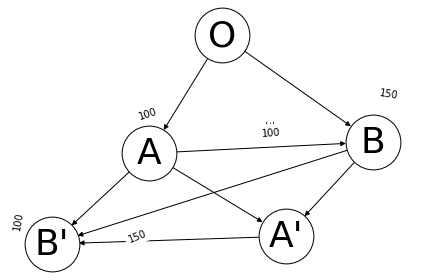

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

options = {
"font_size": 36,
"node_size": 3000,
"node_color": "white",
"edgecolors": "black",
"linewidths": 1,
#"width": 5,
}

weighted_edges = [
    (o,d,dist_matrix[o][d])
    for o in dist_matrix
    for d in dist_matrix[o]
    if dist_matrix[o][d] != BIG
    and o!="O'" and d!="O'"
]
    

print(weighted_edges)

G.add_weighted_edges_from(weighted_edges)

print("Drawing graph")
print(G)
print(G.edges)

labels = nx.get_edge_attributes(G,'weight')
pos=nx.spring_layout(G)
nx.draw_networkx(G, arrows=True, **options)

nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
dist_matrix = {
    "O":  {"O": BIG, "A": 150, "B": 100, "A'": BIG, "B'": BIG, "O'": 0},
    "A":  {"O": BIG, "A": BIG, "B": 25,  "A'": 150, "B'": 100, "O'": BIG},
    "B":  {"O": BIG, "A": 150, "B": BIG, "A'": 400, "B'": 300, "O'": BIG},
    "A'": {"O": BIG, "A": 300, "B": 100, "A'": BIG, "B'": 25,  "O'": 0},
    "B'": {"O": BIG, "A": 150, "B": 100, "A'": 150, "B'": BIG, "O'": 0},
    "O'": {"O": BIG, "A": BIG, "B": BIG, "A'": BIG, "B'": BIG, "O'": 0},
    # "A": {"A": 0, "A'": 300, "B": 25},
    # "B": {"B": 0, "A'": 400, "B'": 300},
    # "B'": {"B'": 0, "A'": 300, "B'": 300},
    # "A'": {"B": 300, "B'": 25},
}
